# Homework 13

## Problem 1: world flags
In this problem, we will use the singular value decomposition to study a few national flags. Specifically, we will look at grayscale versions of the US, UK, Chinese and Yemen flags.

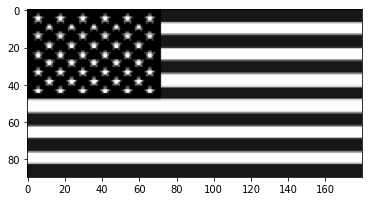

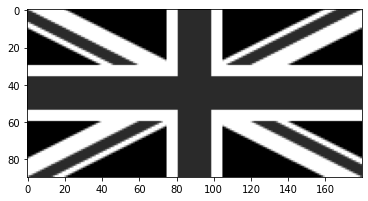

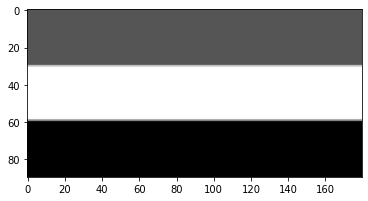

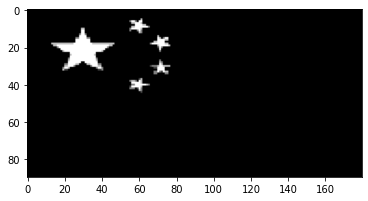

In [3]:
import numpy as np
import matplotlib.pyplot as plt

us_flag = np.load('us_flag.npy')
uk_flag = np.load('uk_flag.npy')
yemen_flag = np.load('yemen_flag.npy')
china_flag = np.load('china_flag.npy')

plt.imshow(us_flag, cmap='gray')
plt.show()
plt.clf()
plt.imshow(uk_flag, cmap='gray')
plt.show()
plt.clf()
plt.imshow(yemen_flag, cmap='gray')
plt.show()
plt.clf()
plt.imshow(china_flag, cmap='gray')
plt.show()

### Part A
Perform a singular value decomposition of each of the flags, and determine the rank of each by counting the number of non-zero singular values (note: you can use a small number, say `eps = 1e-10` as a cutoff for "non-zero" numbers).

### Part B
Fins vectors $u$ and $v$ such that $uv^\top$ is equal to the Yemeni flag.

### Part C
For the US flag, plot (using `plt.imshow()` like above) the first 5 outer products $\sigma_1 u_1v_1^\top,\dots,\sigma_5 u_5v_5^\top$. What do the first 2 outer products seem to represent? What about the next three? 

### Part D
For each $k = 1,\dots, 50$, let $F_k$ be the best rank $k$ approximation to the UK flag. For each $k$, plot $F_k$ and compute the error of this approximation, and the errors as a function of $k$. At what value of $k$ is the flag visually close to the original flag? What is the error at this value of $k$?

## Problem 2: removing watermarks

In this problem, we will investigate the problem of removing watermarks from images.

Let's start with a simple toy image.

In [16]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()     
image = dataset.images[1] 
image = image.mean(axis=2)

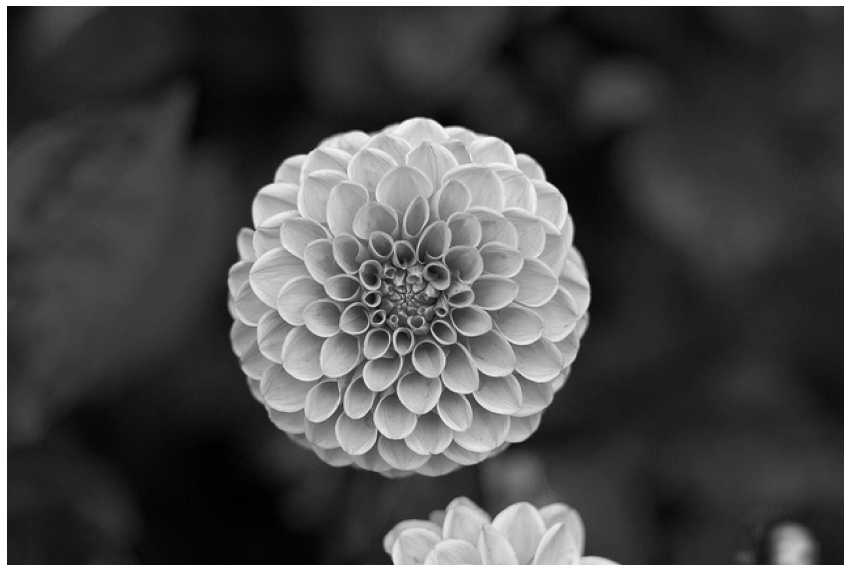

Dimensions: (427, 640)


In [17]:
# Display image
fig = plt.figure(figsize=(15, 11))
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

# Print shape
print('Dimensions:', image.shape)

Often, image owners will add a simple (visually imperceptible) watermark to an image. For example, we add the letters "BERKELEY" to the top right corner of the image.

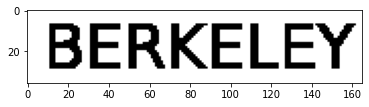

In [19]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure(figsize=(2.3,0.5))
canvas = FigureCanvas(fig)
ax = fig.gca()

ax.text(-0.06,-0.04,"BERKELEY", fontsize=30)
ax.axis('off')

# To remove the huge white borders
ax.margins(0)
ax.set_xticks([])
ax.set_xticks([], minor=True)

canvas.draw()       # draw the canvas, cache the renderer

fig.canvas.draw()
image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
image_from_plot = image_from_plot.mean(axis=2)
plt.imshow(image_from_plot, cmap = 'gray')
plt.show()

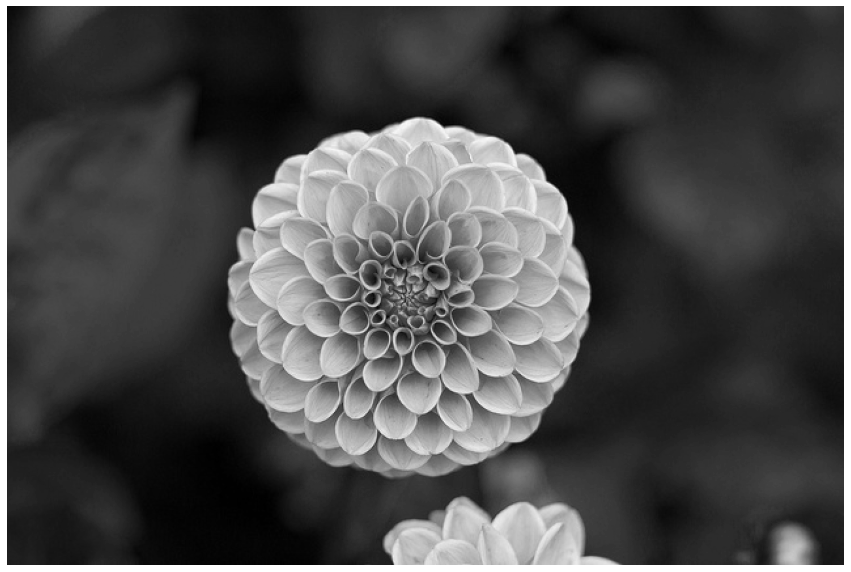

In [21]:
image_watermark = image.copy()
image_watermark[10:46,400:565] += 0.0005 * image_from_plot

fig = plt.figure(figsize=(15, 11))
plt.imshow(image_watermark, cmap='gray')
plt.axis('off')
plt.show()

We can't see the watermark in the above image, but as the image "owner", with access to the original image, we can check that the image has a watermark by looking at `image - image_watermark`.

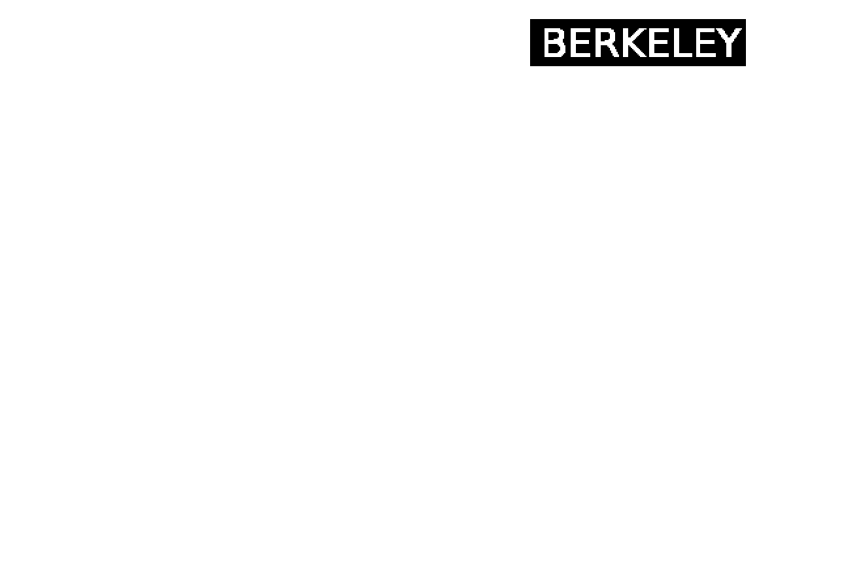

In [22]:
fig = plt.figure(figsize=(15, 11))
plt.imshow(image-image_watermark, cmap='gray')
plt.axis('off')
plt.show()

Your goal in this problem is to find an approximation `image_watermark_removed` to `image_watermark` such that 1) `image_watermark_removed` looks visually the same as `image_watermark` and 2) the watermark is not visible when we plot `image-image_watermark_removed`. For this problem, you are _not_ allowed to use the original image (except to check `image-image_watermark_removed` -- only the watermarked image.